In [6]:
import torch.nn as nn
import pandas as pd
import json
import os
import numpy as np
import pickle
import json
import scipy
from torch.utils.data import Dataset, DataLoader
import torch
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# define random seeds for Neural Networks
torch.manual_seed(0)
np.random.seed(0)

# ignore warnings jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load config file
with open('../utils/configs.json') as f:
    config = json.load(f)

In [8]:
model = 'AE'
data_name = 'METR-LA'

In [9]:
# laod outlier scores
outlier_score_path = f'../results/{data_name}/outlier_scores/{model}'

In [10]:
def base_df(start_date = '2018-01-01', end_date = '2020-04-01'):
    # generate all the dates between start and end date with 5 minutes interval
    dates = pd.date_range(start_date, end_date, freq='5min')
    df = pd.DataFrame(index=dates)
    df.index.name = 'timestamp'
    return df

In [11]:
def base_df_metr(start_date = '2012-02-05', end_date = '2012-07-28'):
    # generate all the dates between start and end date with 5 minutes interval
    dates = pd.date_range(start_date, end_date, freq='5min')
    df = pd.DataFrame(index=dates)
    df.index.name = 'timestamp'
    return df 

In [12]:
# correlated_results = {}
# # for each trajectory, direction and intersection, run AE model
# for trajectory in config['trajectories']:
#     correlated_results[trajectory] = {}
#     for direction in config['trajectories'][trajectory]:
#         print(trajectory, direction)
#         df = base_df()
#         for intersection in config['trajectories'][trajectory][direction]:
#             file_path = os.path.join(outlier_score_path,intersection+'_'+direction+'.csv')
#             df_intersection = pd.read_csv(file_path) # load outlier scores
#             df_intersection['timestamp'] = pd.to_datetime(df_intersection['timestamp']) # convert timestamp to datetime
#             df_intersection.set_index('timestamp',inplace=True) # set timestamp as index
#             df_intersection = df_intersection.rename(columns={'outlier_score':intersection})
#             df = df.merge(df_intersection, on='timestamp', how='inner') # merge outlier scores with base df
#         # save the results
#         correlated_results[trajectory][direction]= df


In [13]:
# for METR-LA dataset
correlated_results = {}
# for each trajectory, direction and intersection, run AE model
df = base_df_metr()
for intersection in os.listdir(outlier_score_path):
    if intersection.endswith('.csv'):
        intersection = intersection.split('.')[0]
        file_path = os.path.join(outlier_score_path,intersection+'.csv')
        df_intersection = pd.read_csv(file_path) # load outlier scores
        print(df_intersection.iloc[-1]['timestamp'])
        df_intersection['timestamp'] = pd.to_datetime(df_intersection['timestamp']) # convert timestamp to datetime
        df_intersection.set_index('timestamp',inplace=True) # set timestamp as index
        df_intersection = df_intersection.rename(columns={'outlier_score':intersection})
        df = df.merge(df_intersection, on='timestamp', how='inner') # merge outlier scores with base df
# save the results
correlated_results['df']= df

2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00
2012-06-27 23:00:00


In [15]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [19]:
# keep values grate than 0.5
normalized_df[normalized_df>0.5].dropna().corr()

,717508,772151,767366,769405,769388,716951,717497,717483,717468,772596,...,773916,767750,717504,717510,716949,717458,717465,717459,716960,769346
717508,1.000000,-0.380416,0.119449,0.930707,-0.124591,0.821179,-0.488647,-0.140523,0.017585,-0.506537,...,-0.398740,-0.428387,-0.418450,0.623355,0.851780,-0.313797,-0.384602,-0.398607,0.858705,-0.308992
772151,-0.380416,1.000000,0.564224,-0.332363,0.794258,0.038099,0.927005,0.663222,0.848743,0.969572,...,0.726271,0.968876,0.543283,-0.607404,-0.099507,0.970558,0.942784,0.960452,0.005462,0.984147
767366,0.119449,0.564224,1.000000,0.237959,0.556083,0.365804,0.343952,0.549188,0.769839,0.404666,...,0.082486,0.529967,-0.009174,-0.560643,0.190346,0.485309,0.506011,0.481126,0.511923,0.603561
769405,0.930707,-0.332363,0.237959,1.000000,-0.031865,0.850609,-0.517499,0.013109,0.058267,-0.470918,...,-0.522643,-0.375463,-0.580269,0.424541,0.833733,-0.324174,-0.343682,-0.362948,0.883352,-0.254923
769388,-0.124591,0.794258,0.556083,-0.031865,1.000000,0.161119,0.633470,0.881657,0.889316,0.745550,...,0.420020,0.809889,0.142858,-0.500388,0.036119,0.826558,0.850092,0.822128,0.168992,0.873626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717458,-0.313797,0.970558,0.485309,-0.324174,0.826558,0.052934,0.930117,0.633974,0.867401,0.954394,...,0.783703,0.949627,0.545119,-0.481314,-0.064736,1.000000,0.949987,0.958601,0.015928,0.973906
717465,-0.384602,0.942784,0.506011,-0.343682,0.850092,-0.029781,0.890001,0.669403,0.822745,0.958274,...,0.759877,0.903214,0.413908,-0.582918,-0.216707,0.949987,1.000000,0.993481,-0.072498,0.958667
717459,-0.398607,0.960452,0.481126,-0.362948,0.822128,-0.023379,0.921015,0.641268,0.801899,0.977631,...,0.790165,0.909952,0.486460,-0.573531,-0.198665,0.958601,0.993481,1.000000,-0.083028,0.962052
716960,0.858705,0.005462,0.511923,0.883352,0.168992,0.951144,-0.208349,0.114791,0.398699,-0.176618,...,-0.292188,-0.052125,-0.359137,0.211257,0.913766,0.015928,-0.072498,-0.083028,1.000000,0.075051


In [56]:
# save the results as pickle file
with open(f'../results/{data_name}/outlier_scores/{model}/correlated_results.pickle', 'wb') as f:
    pickle.dump(correlated_results,f)

In [57]:
def plot_heatmap(df, trajectory,direction):
    fig, ax = plt.subplots(facecolor='w')
    sns.heatmap(df.corr())
    plt.title(f"Correlations for {trajectory} {direction}")
    plt.xlabel('Intersection')
    plt.ylabel('Intersection')
    plt.show()
    return

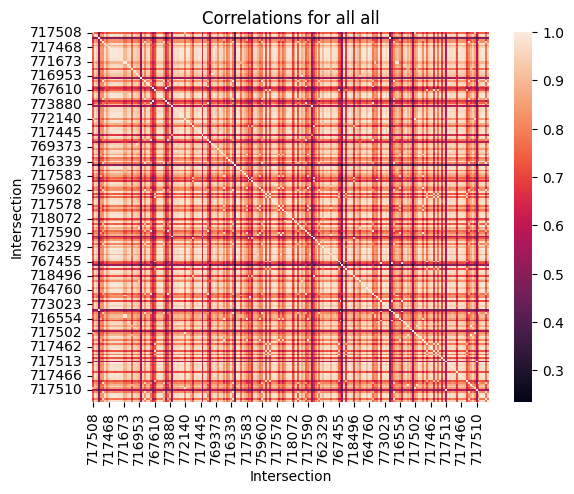

In [58]:
df = correlated_results['df']
plot_heatmap(df, 'all','all')

T1 North


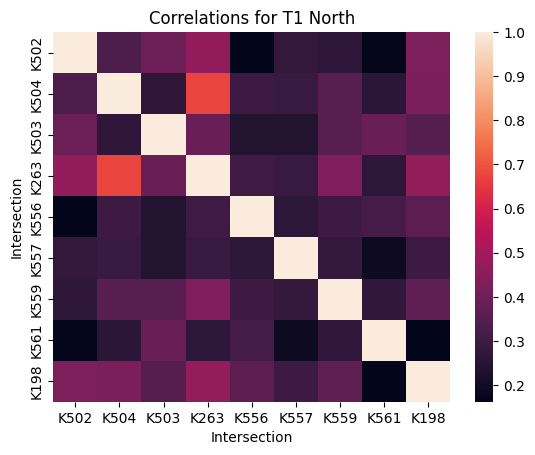

T1 South


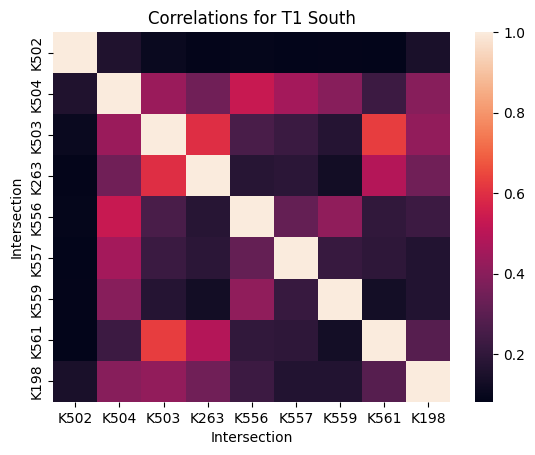

T2 South


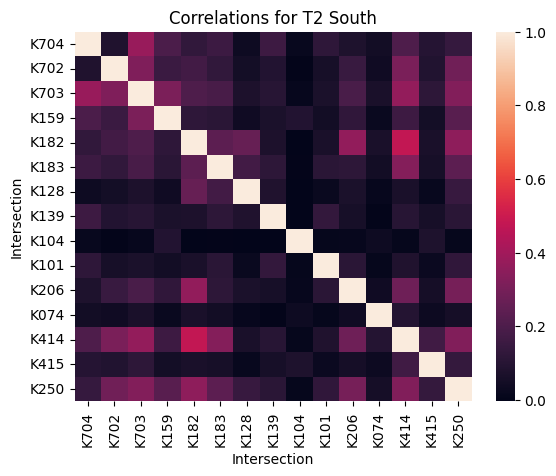

T2 North


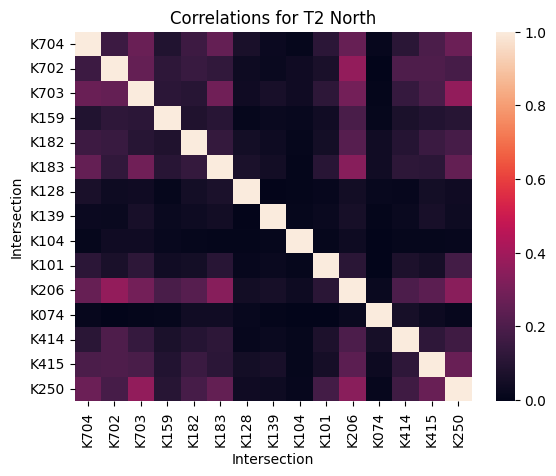

In [67]:
df = correlated_results['df']
plot_heatmap(df, 'all','all')

In [68]:
# for trajectory in correlated_results.keys():
#     for direction in correlated_results[trajectory].keys():
#         print(trajectory,direction)
#         df = correlated_results[trajectory][direction]
#         plot_heatmap(df, trajectory,direction)

In [103]:
correlated_results['df'].corr()

,717508,772151,767366,769405,769388,716951,717497,717483,717468,772596,...,773916,767750,717504,717510,716949,717458,717465,717459,716960,769346
717508,1.000000,0.698464,0.671492,0.477197,0.626261,0.601593,0.687661,0.600036,0.686771,0.678864,...,0.649258,0.659261,0.880491,0.616648,0.624041,0.689288,0.667120,0.666434,0.617733,0.682333
772151,0.698464,1.000000,0.930730,0.506301,0.852705,0.818034,0.976920,0.872522,0.953684,0.984595,...,0.879022,0.952377,0.820935,0.586515,0.827386,0.976014,0.970202,0.972706,0.811265,0.978174
767366,0.671492,0.930730,1.000000,0.517400,0.809607,0.798640,0.916571,0.820018,0.919474,0.924598,...,0.811738,0.908861,0.755312,0.549558,0.807887,0.922759,0.905786,0.907722,0.802661,0.924460
769405,0.477197,0.506301,0.517400,1.000000,0.457958,0.437863,0.492907,0.422968,0.498301,0.488600,...,0.464862,0.488198,0.430270,0.455451,0.466788,0.501723,0.468821,0.466155,0.470285,0.492472
769388,0.626261,0.852705,0.809607,0.457958,1.000000,0.717751,0.854961,0.769097,0.850688,0.862054,...,0.773591,0.828524,0.733326,0.537099,0.720159,0.859258,0.856814,0.857482,0.703766,0.853911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717458,0.689288,0.976014,0.922759,0.501723,0.859258,0.816415,0.975962,0.873276,0.957784,0.980600,...,0.877676,0.947028,0.812700,0.589506,0.824022,1.000000,0.969406,0.970430,0.805158,0.972593
717465,0.667120,0.970202,0.905786,0.468821,0.856814,0.805371,0.975851,0.884152,0.946586,0.986606,...,0.888960,0.940763,0.809758,0.568991,0.802328,0.969406,1.000000,0.993542,0.780949,0.975486
717459,0.666434,0.972706,0.907722,0.466155,0.857482,0.806905,0.977267,0.884365,0.947330,0.988043,...,0.888028,0.942345,0.810175,0.566848,0.805369,0.970430,0.993542,1.000000,0.782208,0.977148
716960,0.617733,0.811265,0.802661,0.470285,0.703766,0.978167,0.797083,0.710706,0.793216,0.799758,...,0.713961,0.788400,0.662463,0.528620,0.985911,0.805158,0.780949,0.782208,1.000000,0.803412


In [69]:
correlated_results['T1']['North'].corr()

,K502,K504,K503,K263,K556,K557,K559,K561,K198
K502,1.000000,0.330388,0.393906,0.468859,0.164201,0.276675,0.264612,0.170635,0.428697
K504,0.330388,1.000000,0.267208,0.672784,0.298868,0.286640,0.356081,0.258757,0.423634
K503,0.393906,0.267208,1.000000,0.389323,0.239565,0.239185,0.357973,0.389136,0.351524
K263,0.468859,0.672784,0.389323,1.000000,0.302292,0.288732,0.433167,0.262109,0.472026
K556,0.164201,0.298868,0.239565,0.302292,1.000000,0.260720,0.295169,0.313673,0.363049
K557,0.276675,0.286640,0.239185,0.288732,0.260720,1.000000,0.277239,0.190483,0.297592
K559,0.264612,0.356081,0.357973,0.433167,0.295169,0.277239,1.000000,0.271980,0.369052
K561,0.170635,0.258757,0.389136,0.262109,0.313673,0.190483,0.271980,1.000000,0.162200
K198,0.428697,0.423634,0.351524,0.472026,0.363049,0.297592,0.369052,0.162200,1.000000


In [70]:
correlated_results['T1']['South'].corr()

,K502,K504,K503,K263,K556,K557,K559,K561,K198
K502,1.000000,0.160319,0.104519,0.089013,0.089573,0.082124,0.089116,0.083247,0.144638
K504,0.160319,1.000000,0.436002,0.344404,0.533099,0.456525,0.397368,0.227386,0.396208
K503,0.104519,0.436002,1.000000,0.598067,0.259850,0.223488,0.172020,0.628567,0.417026
K263,0.089013,0.344404,0.598067,1.000000,0.175571,0.188764,0.127209,0.488050,0.346470
K556,0.089573,0.533099,0.259850,0.175571,1.000000,0.320311,0.412905,0.203654,0.226295
K557,0.082124,0.456525,0.223488,0.188764,0.320311,1.000000,0.215288,0.194143,0.165961
K559,0.089116,0.397368,0.172020,0.127209,0.412905,0.215288,1.000000,0.132234,0.167818
K561,0.083247,0.227386,0.628567,0.488050,0.203654,0.194143,0.132234,1.000000,0.289702
K198,0.144638,0.396208,0.417026,0.346470,0.226295,0.165961,0.167818,0.289702,1.000000


In [71]:
correlated_results['T2']['North'].corr()

,K704,K702,K703,K159,K182,K183,K128,K139,K104,K101,K206,K074,K414,K415,K250
K704,1.000000,0.155229,0.268645,0.085759,0.158785,0.258551,0.065601,0.025259,0.008340,0.110735,0.259135,0.013597,0.106315,0.193084,0.273609
K702,0.155229,1.000000,0.257214,0.118434,0.148280,0.128051,0.032536,0.020876,0.039277,0.063774,0.367152,-0.000366,0.201965,0.202563,0.184056
K703,0.268645,0.257214,1.000000,0.113733,0.100776,0.285827,0.036871,0.062828,0.037522,0.116037,0.290820,0.007408,0.139004,0.189636,0.364512
K159,0.085759,0.118434,0.113733,1.000000,0.081625,0.103540,0.008440,0.022340,0.017878,0.043218,0.189976,0.011782,0.069049,0.087685,0.099894
K182,0.158785,0.148280,0.100776,0.081625,1.000000,0.136163,0.050987,0.035285,0.008931,0.048683,0.221199,0.040924,0.097417,0.152646,0.182875
K183,0.258551,0.128051,0.285827,0.103540,0.136163,1.000000,0.069358,0.044803,0.006504,0.102202,0.337801,0.039708,0.114212,0.112670,0.251203
K128,0.065601,0.032536,0.036871,0.008440,0.050987,0.069358,1.000000,0.000997,0.007433,0.015660,0.044055,0.019213,0.014854,0.048543,0.037970
K139,0.025259,0.020876,0.062828,0.022340,0.035285,0.044803,0.000997,1.000000,0.010095,0.022840,0.057302,0.006978,0.022569,0.059449,0.033628
K104,0.008340,0.039277,0.037522,0.017878,0.008931,0.006504,0.007433,0.010095,1.000000,0.009079,0.033957,-0.000171,0.009272,0.011239,0.014129
K101,0.110735,0.063774,0.116037,0.043218,0.048683,0.102202,0.015660,0.022840,0.009079,1.000000,0.109053,-0.003780,0.072398,0.054424,0.176306


In [72]:
correlated_results['T2']['South'].corr()

,K704,K702,K703,K159,K182,K183,K128,K139,K104,K101,K206,K074,K414,K415,K250
K704,1.000000,0.080914,0.377122,0.195648,0.129686,0.156704,0.035339,0.157665,0.017593,0.118673,0.077359,0.045661,0.202996,0.096787,0.140300
K702,0.080914,1.000000,0.318515,0.152082,0.172597,0.127017,0.051374,0.089854,0.001313,0.058679,0.146751,0.038679,0.309936,0.086394,0.283209
K703,0.377122,0.318515,1.000000,0.312464,0.203650,0.184960,0.074594,0.099639,0.012568,0.069919,0.189128,0.063535,0.365582,0.114896,0.327168
K159,0.195648,0.152082,0.312464,1.000000,0.121338,0.107533,0.035976,0.069553,0.089621,0.046238,0.122585,0.022304,0.159746,0.048327,0.224529
K182,0.129686,0.172597,0.203650,0.121338,1.000000,0.237093,0.260998,0.073845,-0.003390,0.063526,0.363527,0.065137,0.475723,0.064124,0.354972
K183,0.156704,0.127017,0.184960,0.107533,0.237093,1.000000,0.169980,0.116212,0.001708,0.106555,0.116830,0.045251,0.332855,0.055409,0.237509
K128,0.035339,0.051374,0.074594,0.035976,0.260998,0.169980,1.000000,0.080001,-0.003487,0.022181,0.068223,0.012285,0.066089,0.016483,0.143365
K139,0.157665,0.089854,0.099639,0.069553,0.073845,0.116212,0.080001,1.000000,-0.000082,0.133639,0.055908,0.000448,0.100441,0.056944,0.107725
K104,0.017593,0.001313,0.012568,0.089621,-0.003390,0.001708,-0.003487,-0.000082,1.000000,0.010170,0.013232,0.034879,0.010972,0.076885,0.010140
K101,0.118673,0.058679,0.069919,0.046238,0.063526,0.106555,0.022181,0.133639,0.010170,1.000000,0.107924,0.011261,0.079712,0.026433,0.123160


In [58]:
correlated_results

{'T1': {'North':                          K502      K504      K503      K263      K556  \
  timestamp                                                               
  2018-01-01 01:00:00  0.581552  0.924355  0.678917  0.580323  1.011816   
  2018-01-01 02:00:00  0.833481  0.768982  1.088581  0.875307  0.737809   
  2018-01-01 03:00:00  0.837261  0.869662  0.975351  0.902531  0.863356   
  2018-01-01 04:00:00  1.039092  0.850385  0.950976  0.897559  0.987289   
  2018-01-01 05:00:00  1.048851  0.862610  0.931401  0.867656  0.795293   
  ...                       ...       ...       ...       ...       ...   
  2020-03-30 20:00:00  1.037163  0.978769  0.983110  0.970669  1.091025   
  2020-03-30 21:00:00  0.976095  1.034538  0.977496  0.942143  1.005997   
  2020-03-30 22:00:00  0.943266  0.946115  0.950829  0.866231  1.111294   
  2020-03-30 23:00:00  1.148283  1.131940  1.045876  1.053690  1.050337   
  2020-03-31 00:00:00  1.079130  1.240889  0.902702  0.856872  0.869401   
  
       

In [59]:
with open('../data/OBIS_results.pickle', 'rb') as f:
    results = pickle.load(f)

In [60]:
results['T1']['North']['lof_df']

,K502,K504,K503,K263,K556,K557,K559,K561,K198
timestamp,,,,,,,,,
2018-01-01 00:00:00,1.135469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,0.983539,0.986246,0.961889,0.966621,0.979518,0.970879,0.974482,0.954100,0.945818
2018-01-01 02:00:00,1.004457,0.987169,0.949001,1.018715,0.942231,0.993697,0.954347,0.967616,0.937242
2018-01-01 03:00:00,0.999542,1.055629,1.000696,0.999394,0.995447,0.980556,0.978262,0.980209,1.013693
2018-01-01 04:00:00,0.993540,1.611556,1.013545,1.073884,1.079002,0.990713,0.995898,0.986004,0.991805
...,...,...,...,...,...,...,...,...,...
2020-03-31 19:00:00,1.214469,6.679295,1.526070,1.295858,1.019057,0.968667,1.750148,0.996713,1.446675
2020-03-31 20:00:00,0.943426,0.969221,0.961866,0.974532,1.166357,0.978887,1.617988,1.334510,2.221066
2020-03-31 21:00:00,1.104595,1.027644,0.985285,2.075074,1.259547,2.460222,0.982032,0.964793,0.983727


In [65]:
correlated_results = {}
# for each trajectory, direction and intersection, run AE model
for trajectory in config['trajectories']:
    correlated_results[trajectory] = {}
    for direction in config['trajectories'][trajectory]:
        print(trajectory, direction)
        lof_df = results[trajectory][direction]['lof_df']
        # save the results
        correlated_results[trajectory][direction]= lof_df

T1 North
T1 South
T2 South
T2 North


In [66]:
correlated_results

{'T1': {'North':                          K502      K504      K503      K263      K556  \
  timestamp                                                               
  2018-01-01 00:00:00  1.135469       NaN       NaN       NaN       NaN   
  2018-01-01 01:00:00  0.983539  0.986246  0.961889  0.966621  0.979518   
  2018-01-01 02:00:00  1.004457  0.987169  0.949001  1.018715  0.942231   
  2018-01-01 03:00:00  0.999542  1.055629  1.000696  0.999394  0.995447   
  2018-01-01 04:00:00  0.993540  1.611556  1.013545  1.073884  1.079002   
  ...                       ...       ...       ...       ...       ...   
  2020-03-31 19:00:00  1.214469  6.679295  1.526070  1.295858  1.019057   
  2020-03-31 20:00:00  0.943426  0.969221  0.961866  0.974532  1.166357   
  2020-03-31 21:00:00  1.104595  1.027644  0.985285  2.075074  1.259547   
  2020-03-31 22:00:00  1.326210  5.955487  0.992394  0.972964  1.020318   
  2020-03-31 23:00:00  1.484159  0.970803  1.010712  1.071178  1.268897   
  
       